# Zweiseitenbandmodulation

## Informationssignal

Das Informationssignal $u(t)$ sei ein Multisinussignal der Form
\begin{equation*}
    u(t) = \sum_{i=1}^n a_i \cdot \cos(\omega_i t + \varphi_i) \; .
\end{equation*}

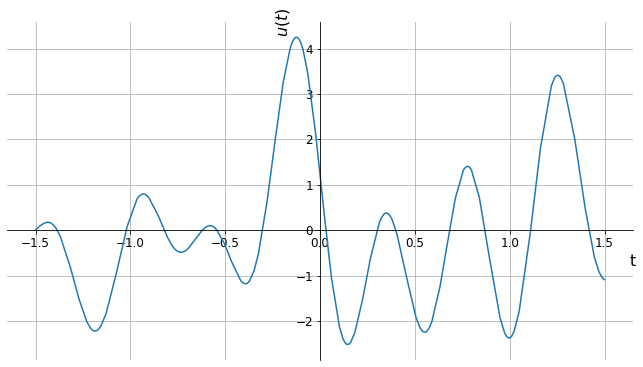

In [6]:
import numpy as np
from sympy import *
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(9,5)
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.grid']='True'
rcParams['axes.labelsize']='16'

t = var('t')
f = var('f')
index = np.linspace(0,4,5,dtype=int)

f_i = np.array([0.6, 1.0, 1.4, 2.0, 2.3])
a_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])
phi_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])

u = 0
for run in index:
    u = u + a_i[run] * cos(2*pi*f_i[run]*t+phi_i[run])
 
plot(u, (t, -1.5, 1.5), ylabel='$u(t)$',axis_center=(0,0))

Das Spektrum $U(j \omega)$ lautet

\begin{equation*}
    U(j \omega) = \pi \cdot \sum_{i=1}^n a_i \cdot \left[ \delta(\omega - \omega_i) \cdot e^{j \varphi_i} + \delta(\omega + \omega_i) \cdot e^{- j \varphi_i} \right] \; .
\end{equation*}

Die folgende Abbildung illustriert das Betragsspektrum $|U(j \omega)|$ für das obige Zeitsignal. Dabei wird das Spektrum analytisch berechnet. Eine symbolische Berechnung mit sympy würde aufgrund er auftretenden Dirac-Impulse zu Problemen führen. Auch eine numerische Berechnung führt aufgrund von des Leck-Effektes der diskreten Fouriertransformation nicht zur exakten Lösung. Man erkennt im Spektrum die Paare von positiven und negativen Frequenzen $\pm f_i$ der Kosinus-Funktionen. Die Bandbreite ergibt sich für dieses spezielle Signal aus der maximalen Frequenz der Kosinussignale zu $B/2 = f_\max = 2.3$ Hz. Positive Frequenzen repräsentieren das obere Seitenband, negative Frequenzen das untere Seitenband.

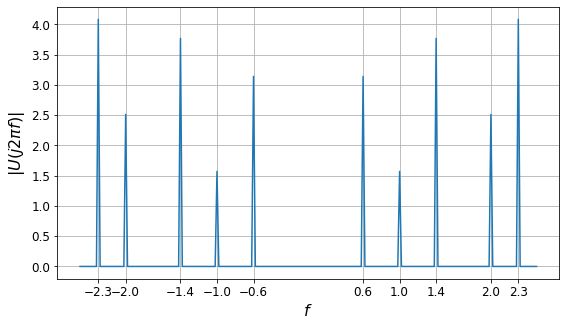

In [2]:
# Abbildung der Frequenzen auf ganzzahlige Werte
N_f = 50
f_int = np.around(f_i*N_f)
f_int = f_int.astype(int)

# Berechnung des Spektrums aus Dirac-Impulsen
U = 0
# cardinality of x axis
f_max = np.amax(f_int)
N_x = f_max * 2 + 1

for run in index:
    fplus = f_int[run]+f_max
    fminus = f_max-f_int[run]
    U = U + a_i[run]*( signal.unit_impulse(N_x,fplus)*exp(I*phi_i[run]) + signal.unit_impulse(N_x,fminus)*exp(-I*phi_i[run]) )

# aus Korrespondenz der Fourier-Transformation: cos(wt) --> pi (delta(w-w_0)+delta(w+w_0))
U = U * np.pi

N_margin = 10
Uplot = np.append(np.zeros((1,N_margin)), U)
Uplot = np.append(Uplot, np.zeros((1,N_margin)))


plt.plot(np.arange(-f_max-N_margin,f_max+N_margin+1)/N_f,abs(Uplot))
plt.xlabel('$f$')
plt.ylabel('$|U(j 2 \pi f)|$')
plt.xticks(np.append(-f_i,f_i))
plt.grid(True)

## Modulation 

Das Informationssignal $u(t)$ wird nun in das Übertragungsband zur Frequenz $f_0$ verschoben. Dies geschieht über

\begin{equation}
    x(t) = u(t) \cdot \cos(\omega_0 t) \; .
\end{equation}

Der unten illustrierte zeitliche Verlauf zeigt die Einhüllende (rot) und das dazwischen oszillierende modulierte Signal.

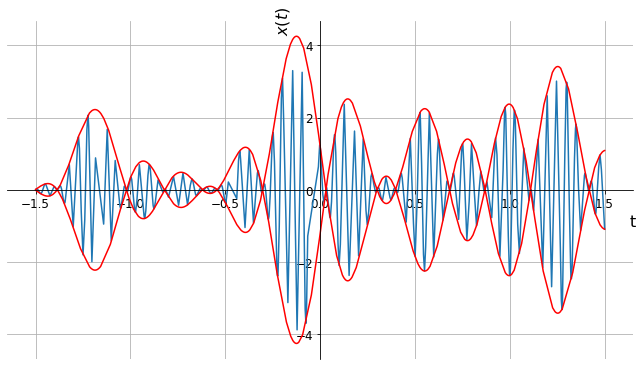

In [4]:
# Trägerfrequenz
f_0 = 20

# moduliertes Zeitsignal
x = u * cos(2 * np.pi * f_0 * t) 

p1 = plot(x, (t, -1.5, 1.5), ylabel='$x(t)$',axis_center=(0,0),show=False)
p2 = plot(u, (t, -1.5, 1.5), ylabel='$u(t)$',axis_center=(0,0),line_color="red",show=False)
p3 = plot(-u, (t, -1.5, 1.5), ylabel='$u(t)$',axis_center=(0,0),line_color="red",show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

Das zugehörige Spektrum lautet

\begin{align}
    X(j \omega) 
    &= \frac{1}{2} \cdot U(j \omega - j \omega_0) + \frac{1}{2} \cdot U(j \omega + j \omega_0) \; . 
\end{align}

Im unteren Bild erkennt man das mit dem Faktor $\frac{1}{2}$ gewichtete Spektrum $U(j 2 \pi f)$, verschoben zu den Frequenzen $-f_0=-20$ und $f_0=20$. Beide Seitenbänder (positive und negative Frequenzen des Basisbandes) werden übertragen. Dadurch verdoppelt sich die Bandbreite gegenüber dem Basisband auf nun $B = 2 f_\max= 4.6$ Hz.

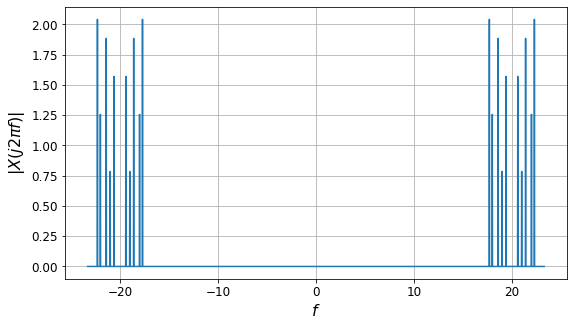

In [5]:
# Spektrum des modulierten Signals
f_0int = f_0*N_f
N_margin = 50

X = np.append(np.zeros((1,f_0int-f_max)), U) / 2.0
X = np.append(np.flipud(X),X)
Xplot = np.append(np.zeros((1,N_margin)), X)
Xplot = np.append(Xplot, np.zeros((1,N_margin)))

plt.plot(np.arange(-f_0int-f_max-N_margin-1,f_0int+f_max+N_margin+1)/N_f,abs(Xplot))
plt.xlabel('$f$')
plt.ylabel('$|X(j 2 \pi f)$|')
plt.grid(True)